<a href="https://colab.research.google.com/github/a-forty-two/EY_batch11_3Mar/blob/main/5Mar_001_FeatureEngineeringAndTimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In previous notebooks-> Permutation based Feature Selection

filepath= 'https://github.com/a-forty-two/EY_batch11_3Mar/raw/refs/heads/main/Sample%20-%20Superstore.xls'
import pandas as pd
data = pd.read_excel(filepath)

In [2]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# let's find cardinality of all columns -> total unique values inside

for col_name in data.columns:
  print(col_name + ' : ' + str(len(set(data[col_name]))))
  if len(set(data[col_name])) < 20:
    print(set(data[col_name])) # unique values printed if cardinality is low

# Conclusions:
# Row ID -> can be converted into index
# Order ID-> multiple rows are indicating same order ID (may be there could be a chance to group by?)
# ORDER Date-> some form of grouping -> maybe to measure profits or sales against this timeline!
# Shipping data-> multiple orders are shipped on same dates!
# shipping mode-> not sure; maybe impacts pricing or delivery?
# Customer ID/Name-> 793 unique customers placing all orders-> could find High-value and low-value customers?
# Segment->


Row ID : 9994
Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
{'Same Day', 'Second Class', 'First Class', 'Standard Class'}
Customer ID : 793
Customer Name : 793
Segment : 3
{'Consumer', 'Home Office', 'Corporate'}
Country : 1
{'United States'}
City : 531
State : 49
Postal Code : 631
Region : 4
{'South', 'East', 'Central', 'West'}
Product ID : 1862
Category : 3
{'Office Supplies', 'Technology', 'Furniture'}
Sub-Category : 17
{'Machines', 'Furnishings', 'Fasteners', 'Phones', 'Binders', 'Appliances', 'Envelopes', 'Tables', 'Accessories', 'Art', 'Storage', 'Labels', 'Bookcases', 'Chairs', 'Supplies', 'Paper', 'Copiers'}
Product Name : 1850
Sales : 6144
Quantity : 14
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
Discount : 12
{0.0, 0.8, 0.2, 0.3, 0.45, 0.5, 0.7, 0.6, 0.32, 0.1, 0.4, 0.15}
Profit : 7545


In [5]:
data = data.set_index('Row ID')

In [6]:
# Let's consider segment column- values are: {'Home Office', 'Consumer', 'Corporate'}

# to convert these strings to integers- {'Home Office': 1, 'Consumer': 2, 'Corporate': 3}
# but in this we cannot form a relation that could be like -> home office + consumer = corp!
# or, Home office < consumer < corporate!

# INDEPENDENT VALUES -> values that have NO RELATIONSHIP b/w them!

# in such cases, we break them into independent columns instead!

# ONE-HOT ENCODING -> every unique value will become its own column!

In [7]:


df = pd.get_dummies(data, columns=['Segment'], prefix='Segment')
print(df.columns)
df.head()

# advantage is, now when ML algo is formed
# w_x * consumer + w_y * corporate + w_z * home_office
# whenever is consumer is present
# w_x * 1 + w_y * 0 + w_z * 0 = w_x

# whenever is home_office is present
# w_x * 0 + w_y * 0 + w_z * 1 = w_z


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office'],
      dtype='object')


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,True,False,False
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,True,False,False
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,False,True,False
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,True,False,False
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,True,False,False


In [8]:
# Label Encoding -> {B:0, M:1} -> only for LABEL COLUMN ; but sometimes also used for input data (eg... words)

# One-Hot encoding -> every unique values becomes a column-> wherever you have categories, or independent variables


In [9]:
# One of the possible Problem statement:  Predict Sales against

In [10]:
# we want to select a group where distribution

# CLASS IMBALANCE presence
print(df['Segment_Home Office'].value_counts())
print(df['Segment_Consumer'].value_counts())
print(df['Segment_Corporate'].value_counts())

Segment_Home Office
False    8211
True     1783
Name: count, dtype: int64
Segment_Consumer
True     5191
False    4803
Name: count, dtype: int64
Segment_Corporate
False    6974
True     3020
Name: count, dtype: int64


In [11]:
# either reduce the falses -> down-sample
# or incrase true cases -> SMOTE -> finds out imbalance distance (max-min classes)-> generates syntheitc data
# while remaining in the same variance, standard deviation, mean values!
# previously -> True-> 1000, false-> 100
# SMOTE 1 -> True -> 1000, false-> 500
# SMOTE 2 -> TRUE-> 1000, false-> 790
# SMOTE 3 -> TRUE-> 1000, false -> 900

# after this SMOTE is no longer applied because it will take samples way beyond the other class itself!

In [12]:
# let's look at categories now
df['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [13]:
# Refined problem statement: find sales trends and future sales for Office Supplies against order date

In [14]:
office_supplies_df = df[df['Category'] == 'Office Supplies']
print(len(office_supplies_df))
office_supplies_df.head()


6026


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office
Row ID,,,,,,,,,,,,,,,,,,,,,
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,False,True,False
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,True,False,False
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,United States,Los Angeles,California,90032,...,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,True,False,False
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,United States,Los Angeles,California,90032,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,True,False,False
10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,United States,Los Angeles,California,90032,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,True,False,False


In [15]:
# office_supplies_df -> what unique values for dates and sales

office_supplies_df['Order Date'].value_counts().count()

1148

In [16]:
office_supplies_df['Order Date'].min(), office_supplies_df['Order Date'].max()

# observe that missing data doesn't always mean NULL values!
# here we have missing dates from sequences!

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [17]:
# now we know this data is from Jan 2014 to Dec 2017
# how many unique days were supposed to be = 365 X 4 + 1

In [18]:
365*4+1

1461

In [19]:
# against 1,461 rows of dates expected- we have only 1148

# DAILY SALES PREDICTION IS OUT OF QUESTION!!

data_grouped = office_supplies_df.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()
data_grouped.tail()

,Order Date,Sales
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440
1147,2017-12-30,299.724


In [20]:
data_grouped.head(10)

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
5,2014-01-09,9.344
6,2014-01-10,2.890
7,2014-01-13,2027.116
8,2014-01-16,48.660
9,2014-01-18,64.864


In [21]:
# maybe try grouping this by MONTH instead

data_grouped.set_index('Order Date', inplace=True)
data_grouped.head(10)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
2014-01-09,9.344
2014-01-10,2.890
2014-01-13,2027.116
2014-01-16,48.660


In [22]:
y = data_grouped['Sales'].resample('MS').mean()

In [23]:
y.head(20)

,Sales
Order Date,
2014-01-01,285.357647
2014-02-01,63.042588
2014-03-01,391.176318
2014-04-01,464.794750
2014-05-01,324.346545
2014-06-01,588.774409
2014-07-01,756.060400
2014-08-01,541.879143
2014-09-01,1015.677704


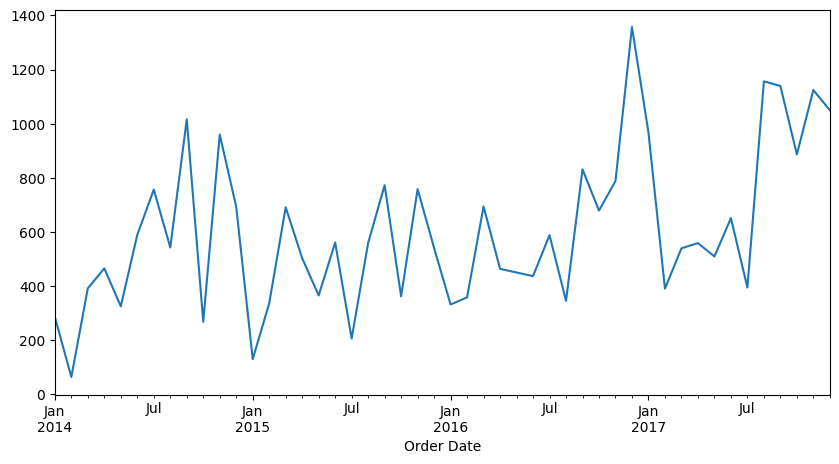

In [24]:
# for current sales
from matplotlib import pyplot as plt
plt.figure()
y.plot(figsize=(10,5))
plt.show()


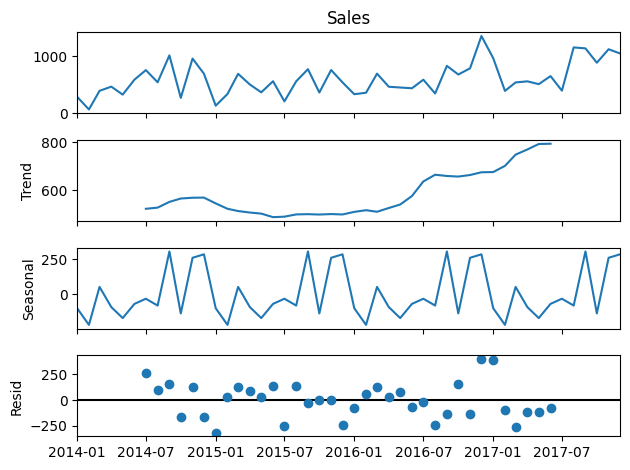

In [25]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [27]:
# in AR I MA -> p,d,q
import itertools
p = d = q = range(0,2) # VALUE generators between [0,1]
pdq = list(itertools.product(p,d,q))
print(pdq)


[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [28]:
seasons = 12 # my data granularity is monthly -> so to take 1 year as a SEASON = 12 months

seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] # if x was (0,1,0), -> (0,1,0,12)
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[0]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[1]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[2]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[3]))

SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 1, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 1, 12)


In [29]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 747.1990404227043
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 541.2293180557832
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 500.73353987806166


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 0, 0)X(0, 1, 1, 12). AIC= 333.7101496345856
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 516.0876543936834


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 497.8852097467942
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 347.44488563489716


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 0, 0)X(1, 1, 1, 12). AIC= 335.90785733276584
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 702.689139524879


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 512.0974803034138
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 487.7601415798673


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 0, 1)X(0, 1, 1, 12). AIC= 319.8625957279242
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 517.4952646450221


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 485.7510355244035
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 345.69220944660077


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 0, 1)X(1, 1, 1, 12). AIC= 320.84506980945605
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 666.4572044948625
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 488.55004694146066


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 503.0840747554472
Model=(0, 1, 0)X(0, 1, 1, 12). AIC= 323.4209932096015
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 500.0109385290892


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 1, 0)X(1, 0, 1, 12). AIC= 482.4855310597864
Model=(0, 1, 0)X(1, 1, 0, 12). AIC= 335.71489594188165


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 0)X(1, 1, 1, 12). AIC= 322.9595401180618
Model=(0, 1, 1)X(0, 0, 0, 12). AIC= 637.3530008825546
Model=(0, 1, 1)X(0, 0, 1, 12). AIC= 465.640849958078
Model=(0, 1, 1)X(0, 1, 0, 12). AIC= 473.71539693318664


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 1)X(0, 1, 1, 12). AIC= 302.4818365922846
Model=(0, 1, 1)X(1, 0, 0, 12). AIC= 489.94199700311975


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 1, 1)X(1, 0, 1, 12). AIC= 464.3667333462566
Model=(0, 1, 1)X(1, 1, 0, 12). AIC= 330.7061513077493


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 1)X(1, 1, 1, 12). AIC= 303.76958103602
Model=(1, 0, 0)X(0, 0, 0, 12). AIC= 680.4032716562347
Model=(1, 0, 0)X(0, 0, 1, 12). AIC= 503.3855608952065
Model=(1, 0, 0)X(0, 1, 0, 12). AIC= 501.7031226672368


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 0)X(0, 1, 1, 12). AIC= 331.47114383420035
Model=(1, 0, 0)X(1, 0, 0, 12). AIC= 500.2190534421446


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 0, 0)X(1, 0, 1, 12). AIC= 498.1235530552365
Model=(1, 0, 0)X(1, 1, 0, 12). AIC= 331.07199732557825


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 0)X(1, 1, 1, 12). AIC= 332.9374884389037
Model=(1, 0, 1)X(0, 0, 0, 12). AIC= 651.1766599950296


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 0, 1)X(0, 0, 1, 12). AIC= 478.35106186776477
Model=(1, 0, 1)X(0, 1, 0, 12). AIC= 488.41688240411827


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model=(1, 0, 1)X(0, 1, 1, 12). AIC= 317.7740772826057
Model=(1, 0, 1)X(1, 0, 0, 12). AIC= 489.25464250466814


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model=(1, 0, 1)X(1, 0, 1, 12). AIC= 477.0174245960573
Model=(1, 0, 1)X(1, 1, 0, 12). AIC= 331.7136838520032


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 1)X(1, 1, 1, 12). AIC= 318.3419019433989
Model=(1, 1, 0)X(0, 0, 0, 12). AIC= 658.0713305703066
Model=(1, 1, 0)X(0, 0, 1, 12). AIC= 485.9723557606887
Model=(1, 1, 0)X(0, 1, 0, 12). AIC= 494.907679737394


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 1, 0)X(0, 1, 1, 12). AIC= 321.1063379045159
Model=(1, 1, 0)X(1, 0, 0, 12). AIC= 482.80837530249585
Model=(1, 1, 0)X(1, 0, 1, 12). AIC= 481.52773491133695


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 1, 0)X(1, 1, 0, 12). AIC= 321.2325469883619


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 1, 0)X(1, 1, 1, 12). AIC= 321.39217692942304
Model=(1, 1, 1)X(0, 0, 0, 12). AIC= 638.7962401105632
Model=(1, 1, 1)X(0, 0, 1, 12). AIC= 467.08061995499213


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 1, 1)X(0, 1, 0, 12). AIC= 475.7138851925949


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 1, 1)X(0, 1, 1, 12). AIC= 304.2344437628577
Model=(1, 1, 1)X(1, 0, 0, 12). AIC= 478.6987301707013


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 1, 1)X(1, 0, 1, 12). AIC= 465.50898811565685
Model=(1, 1, 1)X(1, 1, 0, 12). AIC= 318.23401631311884


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 1, 1)X(1, 1, 1, 12). AIC= 305.3486484380622
**** Smallest PDQ,SPDQ is *****
302.4818365922846
(0, 1, 1)
(0, 1, 1, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:

model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
# (0, 1, 1)X(0, 1, 1, 12)
model2 = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 0), seasonal_order= (1, 0, 1, 12), enforce_stationarity=False)
results = model.fit()
results2 = model2.fit()
# we've taken 2 models so that we can compare their predictions
results.summary() #.tables[1]  # AIC => needs to be lowest

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -148.241
Date:                            Wed, 05 Mar 2025   AIC                            302.482
Time:                                    04:34:09   BIC                            305.615
Sample:                                01-01-2014   HQIC                           303.162
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8701      0.188     -4.640      0.000      -1.238      -0.503
ma.S.L12      -0.9866     36.933     -0.027      0.979     -73.375      71.402
sigma2      5.705e+04   2.09e+06      0.027      0.978   -4.04e+06    4.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.77   Prob(JB):                         0.16
Heteroskedasticity (H):               2.15   Skew:                             1.03
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

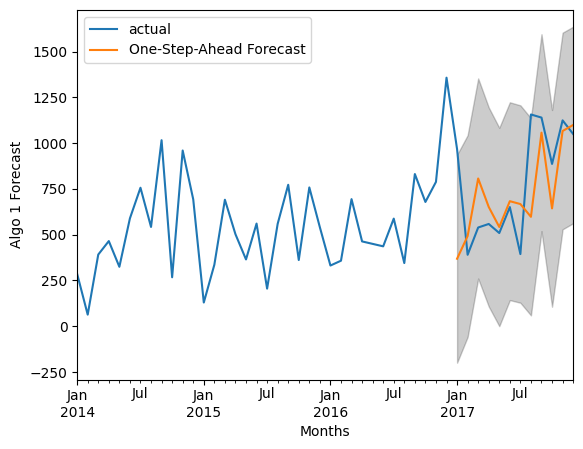

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred2_ci = pred2.conf_int()
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

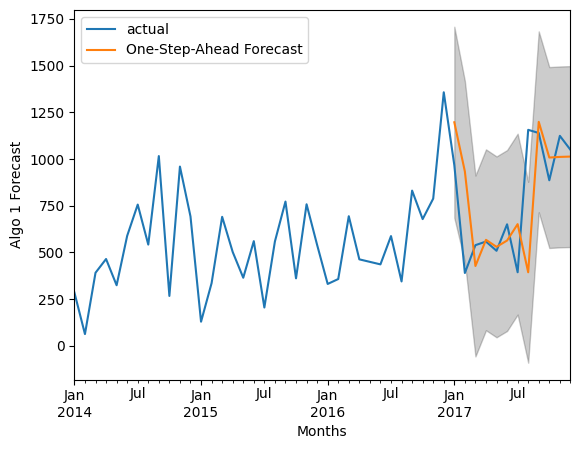

In [33]:
plt.figure()
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred2.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:,0], pred2_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()